<a href="https://colab.research.google.com/github/felmateos/anime-data-analyses/blob/main/Hypepunk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

anime_filepath = "/content/drive/Shareddrives/Hype - Dados (EACH)/Grupos de estudo/Nível 1/Avaliação de animes/anime.csv"
anime_data = pd.read_csv(anime_filepath)
rating_filepath = "/content/drive/Shareddrives/Hype - Dados (EACH)/Grupos de estudo/Nível 1/Avaliação de animes/rating.csv"
rating_data = pd.read_csv(rating_filepath)

In [ ]:
rating_data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
rating_data.tail()

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


In [ ]:
rating_data.dtypes

user_id     int64
anime_id    int64
rating      int64
dtype: object

In [ ]:
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
anime_data.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [ ]:
anime_data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

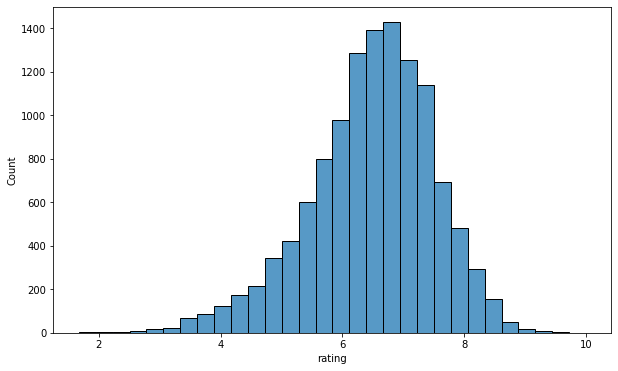

In [ ]:
plt.figure(figsize=(10,6))
#sns.lineplot(data = anime_data['members'], label = "Members")
sns.histplot(data = anime_data['rating'], label="Rating", bins=30)
#sns.histplot(data = anime_data['rating'], label="Rating")

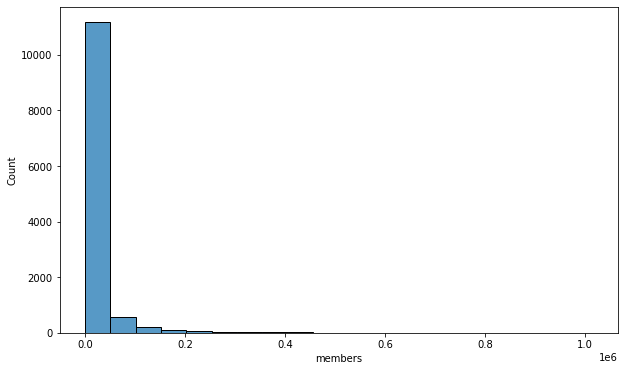

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data = anime_data['members'], label="Members", bins=20)

In [ ]:
anime_data['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [ ]:
anime_data['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [ ]:
from bs4 import BeautifulSoup
import requests

webpage = requests.get("https://myanimelist.net/anime.php")
soup = BeautifulSoup(webpage.content, "html.parser")

genres_tags = soup.find_all(attrs={"class": "genre-name-link"})
genres = []

for x in genres_tags[:21] : 
   genres.append(x.get_text().split(" ")[0])
s = pd.DataFrame(data=genres, columns=["genre"])

print(s)

           genre
0         Action
1      Adventure
2          Avant
3          Award
4           Boys
5         Comedy
6          Drama
7        Fantasy
8          Girls
9        Gourmet
10        Horror
11       Mystery
12       Romance
13        Sci-Fi
14         Slice
15        Sports
16  Supernatural
17      Suspense
18         Ecchi
19       Erotica
20        Hentai


In [ ]:
anime_genre = anime_data["genre"]
anime_genre = anime_genre.str.split(", ")
anime_genre = anime_genre.dropna()
ag = pd.DataFrame(anime_genre)
ag.head()

,genre
0,"[Drama, Romance, School, Supernatural]"
1,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,"[Sci-Fi, Thriller]"
4,"[Action, Comedy, Historical, Parody, Samurai, ..."


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
agmlb = pd.DataFrame(mlb.fit_transform(ag["genre"]),columns=mlb.classes_, index=ag.index)
agmlb.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
anime_data_o = anime_data
anime_data = anime_data.join(agmlb, how='left')
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


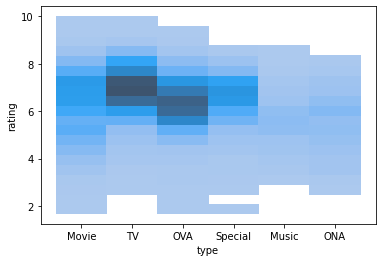

In [ ]:
sns.histplot(data = anime_data, x="type", y="rating", bins=20)

In [ ]:
genre_list = ['Action','Adventure','Cars','Comedy','Dementia','Demons','Drama','Ecchi','Fantasy','Game','Harem','Hentai','Historical','Horror','Josei','Kids','Magic','Martial Arts','Mecha','Military','Music','Mystery','Parody','Police','Psychological','Romance','Samurai','School','Sci-Fi','Seinen','Shoujo','Shoujo Ai','Shounen','Shounen Ai','Slice of Life','Space','Sports','Super Power','Supernatural','Thriller','Vampire','Yaoi','Yuri']
  

In [ ]:
anime_aux = anime_data.sort_values(by=['rating'])
anime_aux = anime_aux.replace('Unknown', np.nan)
anime_aux = anime_aux.dropna(subset=['episodes'])
anime_aux = anime_aux.drop(columns=genre_list)
anime_aux = anime_aux.drop(columns=['anime_id'])
anime_aux['episodes'] = anime_aux['episodes'].astype(int)
anime_aux.dtypes

name         object
genre        object
type         object
episodes      int64
rating      float64
members       int64
dtype: object

In [ ]:
#plt.figure(figsize=(10,6))
#sns.pairplot(data = anime_aux)

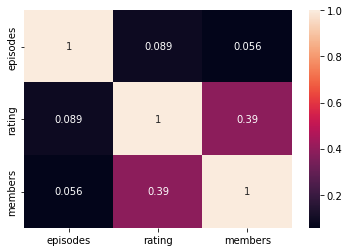

In [ ]:
anime_aux = anime_aux.corr()
#plt.figure(figsize=(10,6))
sns.heatmap(data = anime_aux, annot = True)

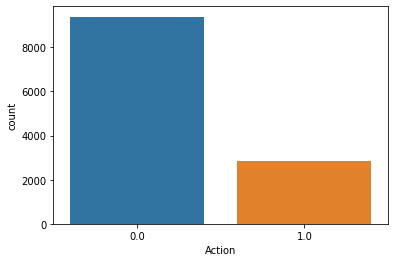

In [ ]:
sns.countplot(data = anime_data, x = "Action")

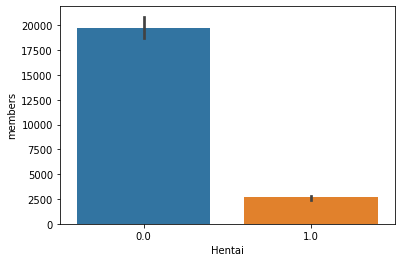

In [ ]:
sns.barplot(data = anime_data, x = "Hentai", y = "members")

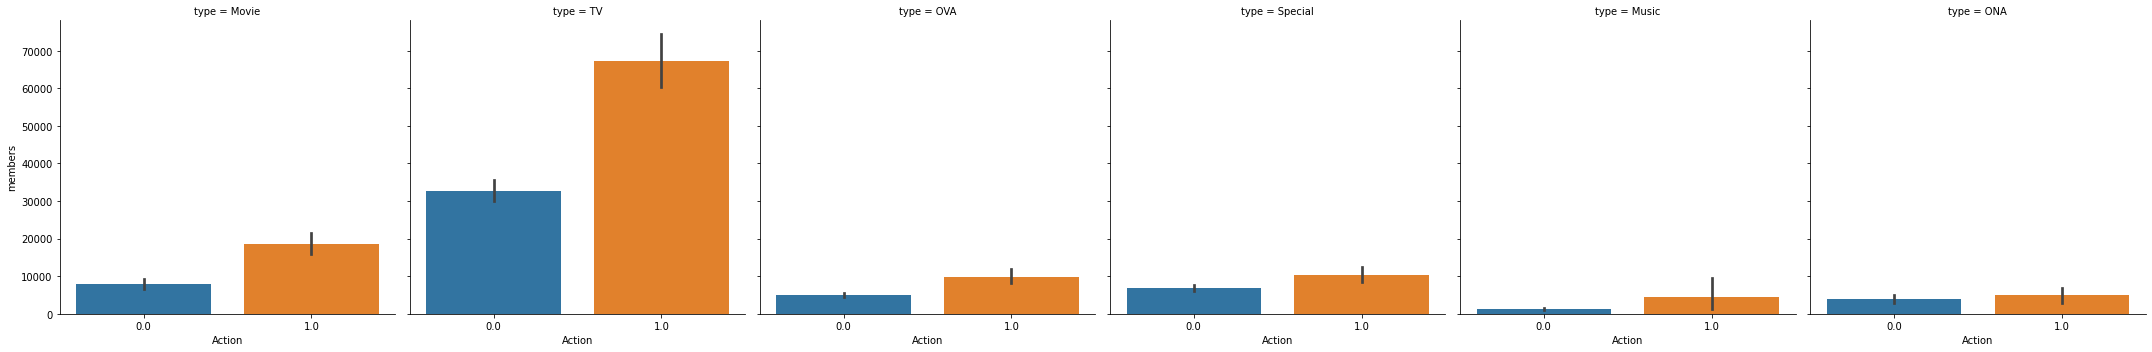

In [ ]:
sns.catplot(data = anime_data, x='Action', y='members', col='type', kind="bar")

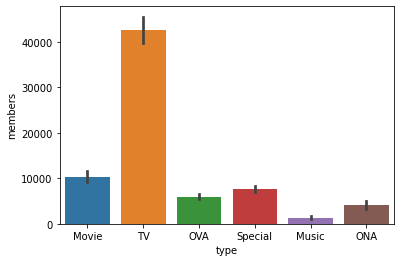

In [ ]:
sns.barplot(data = anime_data, x='type', y='members')

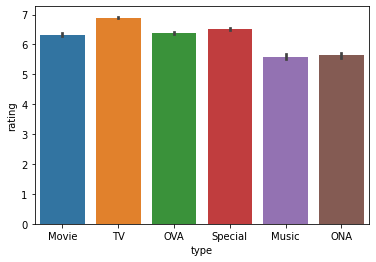

In [ ]:
sns.barplot(data = anime_data, x='type', y='rating')

In [ ]:
action_animes = anime_data[anime_data['genre'].astype(str).str.contains("Action")]
#action_animes = action_animes.sort_values(by=['rating'])
action_animes

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12221,4369,Kunoichi Gakuen Ninpouchou,"Action, Comedy, Demons, Hentai, Martial Arts, ...",OVA,6,5.11,955,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12225,3910,Kyuukyoku no Sex Adventure Kamasutra,"Action, Comedy, Hentai, Romance, Supernatural",OVA,1,5.08,835,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12242,6025,Battle Can²,"Action, Hentai, Sci-Fi",OVA,1,4.69,484,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12244,11141,Blue Seagull,"Action, Hentai",Movie,1,4.60,337,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
hentai_animes = anime_data[anime_data['genre'].astype(str).str.contains("Hentai")]
hentai_animes

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
11114,11879,Oni Chichi: Re-born,Hentai,OVA,2,7.89,14342,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11115,29575,Mankitsu Happening,Hentai,OVA,4,7.83,8510,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11116,15843,Koiito Kinenbi The Animation,Hentai,OVA,2,7.75,6940,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11117,21097,Oni Chichi: Rebuild,Hentai,OVA,3,7.75,9825,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11119,10779,Eroge! H mo Game mo Kaihatsu Zanmai,Hentai,OVA,6,7.68,20316,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12290,5543,Under World,Hentai,OVA,1,4.28,183,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
anime_data_o.groupby(["genre"]).count()

,anime_id,name,type,episodes,rating,members
genre,,,,,,
Action,53,53,53,53,53,53
"Action, Adventure",15,15,15,15,15,15
"Action, Adventure, Cars, Comedy, Sci-Fi, Shounen",2,2,2,2,2,2
"Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports",1,1,1,1,1,1
"Action, Adventure, Cars, Sci-Fi",1,1,1,1,1,1
...,...,...,...,...,...,...
"Super Power, Supernatural, Vampire",1,1,1,1,1,1
Supernatural,14,14,14,14,14,14
Thriller,1,1,1,1,1,1


In [ ]:
action_animes = anime_data[anime_data['genre'].astype(str) == "Action"]
action_animes.head(53)

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
798,33082,Kingsglaive: Final Fantasy XV,Action,Movie,1,7.83,15508,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2697,33080,Brotherhood: Final Fantasy XV,Action,ONA,5,7.18,29445,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,4810,Shinzou Ningen Casshern,Action,TV,35,7.07,2822,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3368,5136,Flag Director&#039;s Edition: Issenman no Kufu...,Action,Movie,1,7.01,987,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3616,4856,Fuuma no Kojirou: Fuuma Hanran-hen,Action,OVA,1,6.93,549,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3651,4854,Fuuma no Kojirou: Yasha-hen,Action,OVA,6,6.92,819,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3685,4855,Fuuma no Kojirou: Seiken Sensou-hen,Action,OVA,6,6.91,690,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4597,29255,Ghost in the Shell Arise Episode: [.jp],Action,Special,1,6.68,2209,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4670,3389,Bus Gamer,Action,TV,3,6.66,20550,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4819,5583,Sonic: Night of the WereHog,Action,ONA,1,6.63,3424,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
